In [20]:
from helper_functions import *
PLOT_PATH = os.path.abspath(os.path.join(PLOT_PATH, "scRNA_dataset-2_BMMC"))
datasetPath = os.path.abspath(os.path.join(datasetPath, "scRNA_dataset-2_BMMC/"))
datasetName = "scRNA_dataset-2_BMMC"

In [2]:
BMMC_object = load_object("BMMC_object.pkl")

In [21]:
data, labels = BMMC_object['pca_data'], BMMC_object['leiden_labels']

In [27]:
labels

array([0, 1, 2, ..., 7, 5, 0], shape=(17041,))

In [4]:
optimizer_model, medoid_paths, title, labels, reordered_labels_split_into_clusters = run_isumap_cluster(data, labels, datasetName=datasetName)

Number of CPU threads =  128

Nearest neighbours computed in: 1.04 sec

Normalization computed in: 6.38 sec
Computing the graph...

Graph computation: 1.73 sec
Applying t-conorm...

T-conorm application: 12.84 sec

Running Dijkstra...

Dijkstra: 85.81 sec
Number of clusters:  10

Performing classical MDS...

classical MDS: 13.87 sec

Starting cluster separation optimization...
Optimizing separation for 10 clusters...
Total parameters: 30
Iteration 0, Loss: 59.784607
Iteration 10, Loss: 0.549174
Iteration 20, Loss: 0.176291
Iteration 30, Loss: 0.078502
Iteration 40, Loss: 0.016197
Iteration 50, Loss: 0.005861
Iteration 60, Loss: 0.004792
Converged at iteration 60

Isumap total time: 3.37 min


In [28]:
optimizer_model

ClusterSeparationOptimizer()

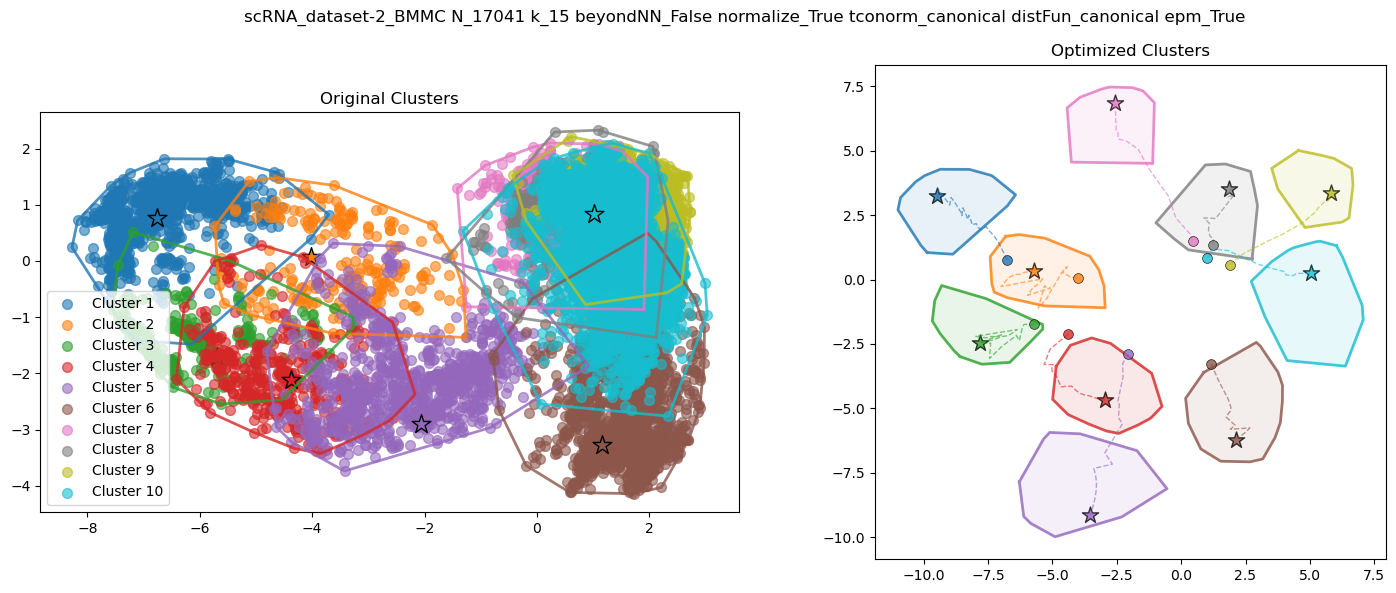

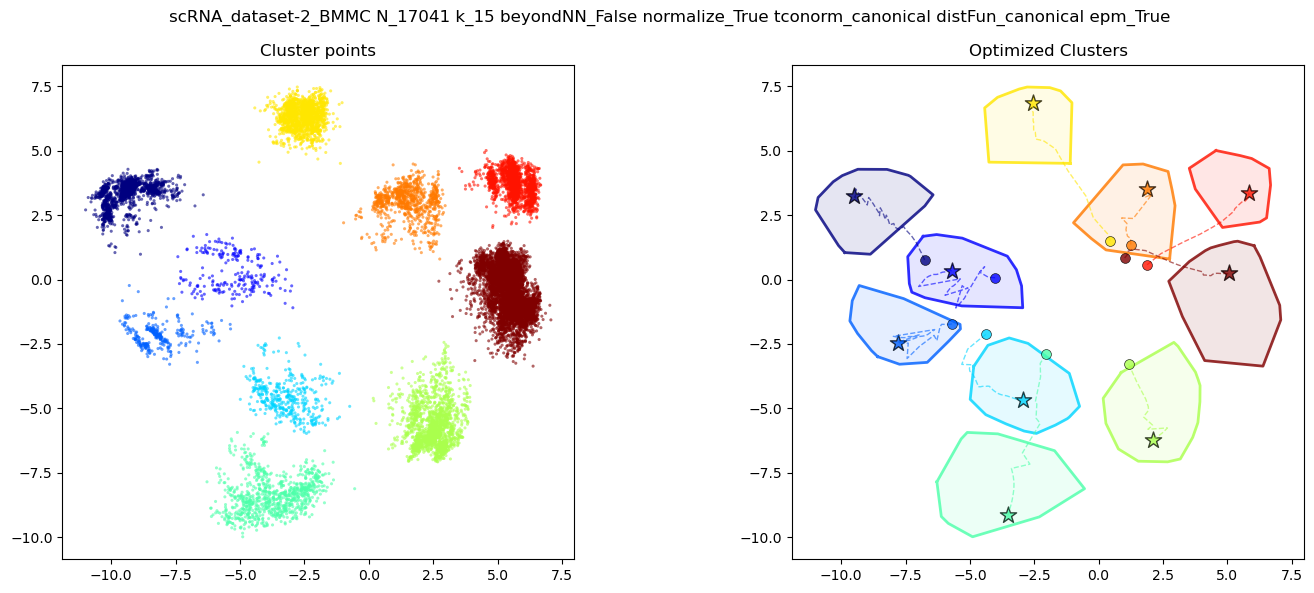

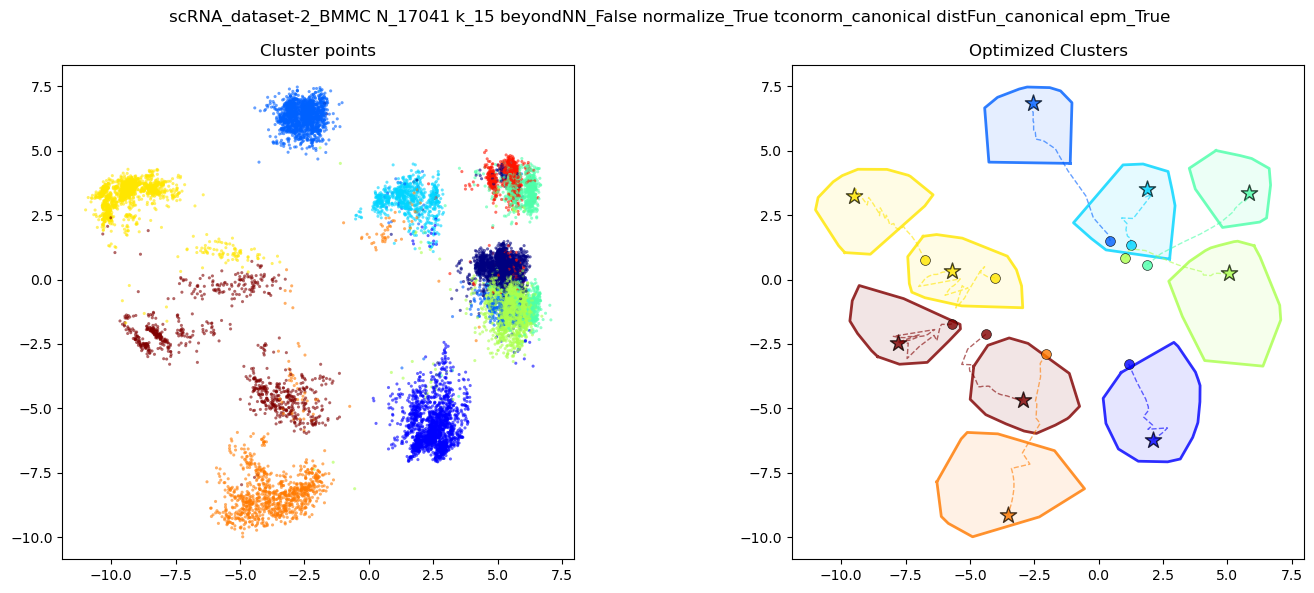

In [6]:
plot_isumap_cluster(optimizer_model, medoid_paths, title, labels=reordered_labels_split_into_clusters, enable_grid=False, plot_path=PLOT_PATH)

In [22]:
transformed_clusters = optimizer_model.apply_transformations()
ok = [t.detach().numpy() for t in transformed_clusters]
okd = np.concatenate(ok)

In [25]:
np.concatenate(reordered_labels_split_into_clusters)

array([6, 6, 6, ..., 4, 5, 0], shape=(17041,))

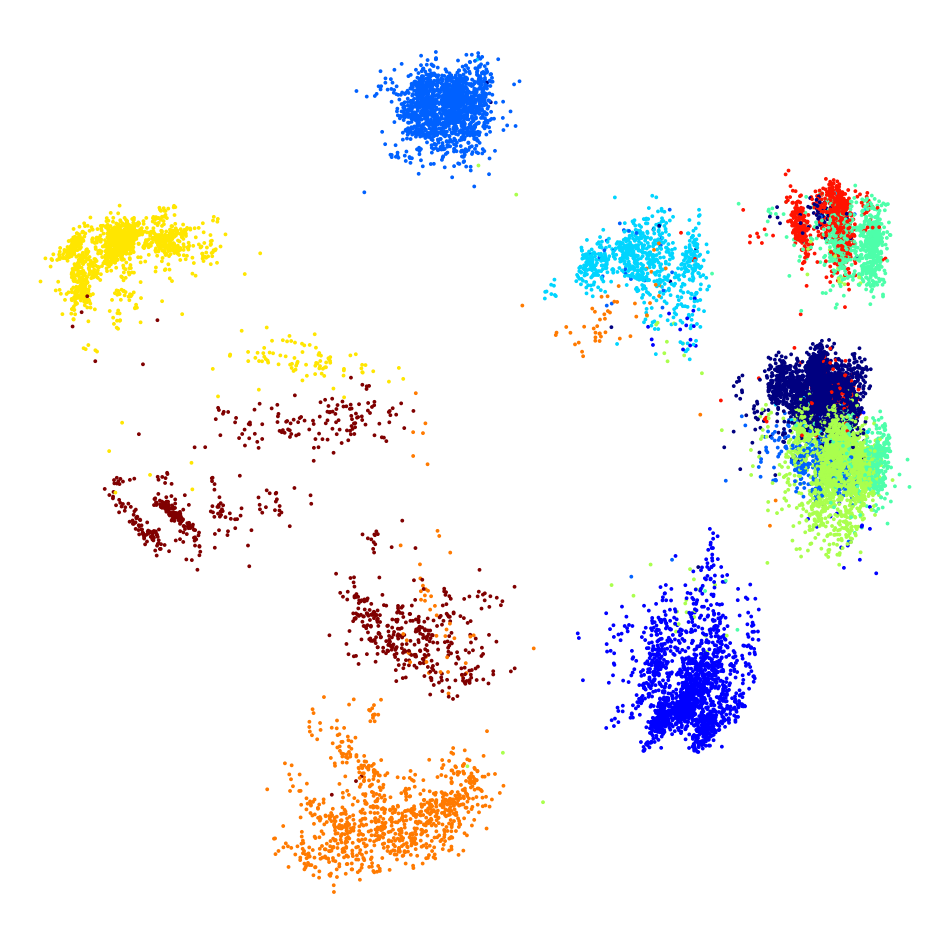

In [26]:
plot_data(okd, np.concatenate(reordered_labels_split_into_clusters), title="", display=True, save=True, grid=False, axis=False)

In [7]:
from umap import UMAP

In [8]:
%%time
embedding = UMAP().fit(data)

CPU times: user 2min 47s, sys: 36.6 s, total: 3min 24s
Wall time: 33.5 s


In [9]:
BMMC_umapEmb = embedding.embedding_
save_object(BMMC_umapEmb, "BMMC_umapEmb.pkl")

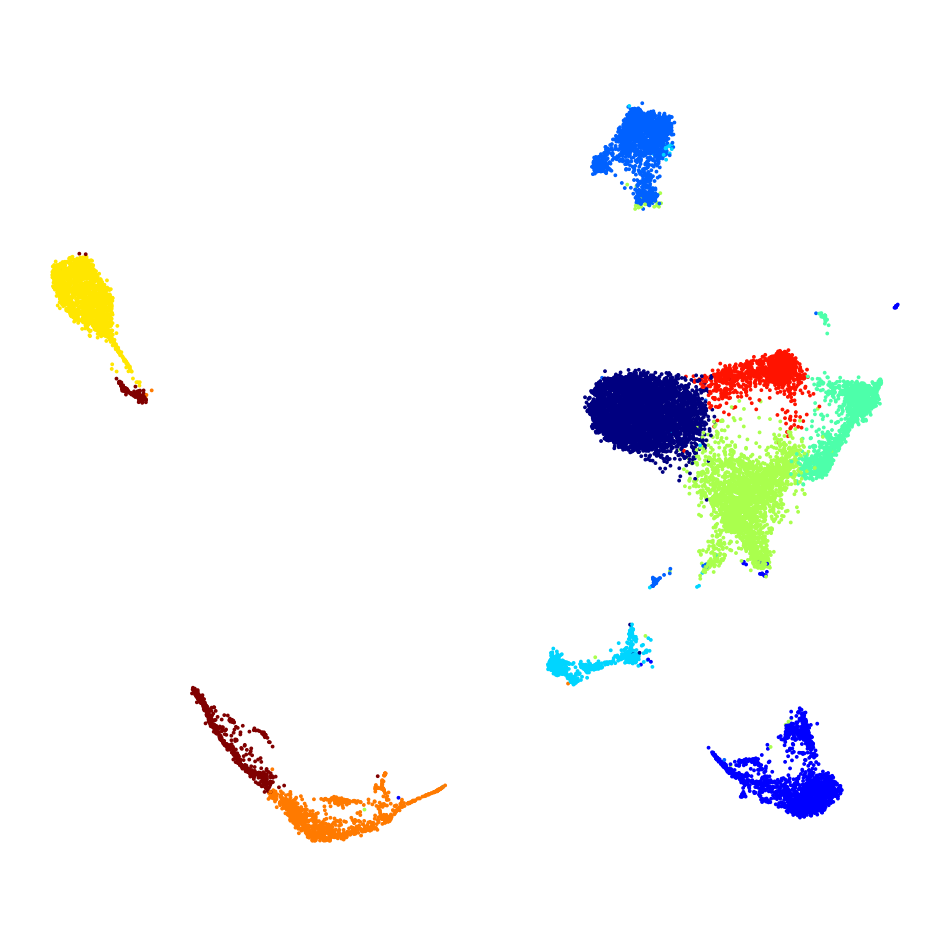

In [10]:
plot_data(BMMC_umapEmb, labels, title="", display=True, save=True, grid=False, axis=False)

In [12]:
from isumap import efficient_isomap

In [14]:
isomap_embedding = efficient_isomap(data, 15, 2)

Number of CPU threads =  128

Nearest neighbours computed in: 0.76 sec

Normalization computed in: 0.00 sec
Computing the graph...

Graph computation: 1.88 sec
Applying t-conorm...

T-conorm application: 14.36 sec

Running Dijkstra...

Dijkstra: 43.72 sec

Extracted connected components in: 0.00 sec
Number of clusters = 1

Mean points and labels: 0.01 sec

Euclidean distances: 0.01 sec

Performing classical MDS...

classical MDS: 0.00 sec

Embedded the cluster mean points in: 0.00 sec

Reducing dimension...

Performing classical MDS...

classical MDS: 10.03 sec

Computed submatrix embeddings in: 10.22 sec


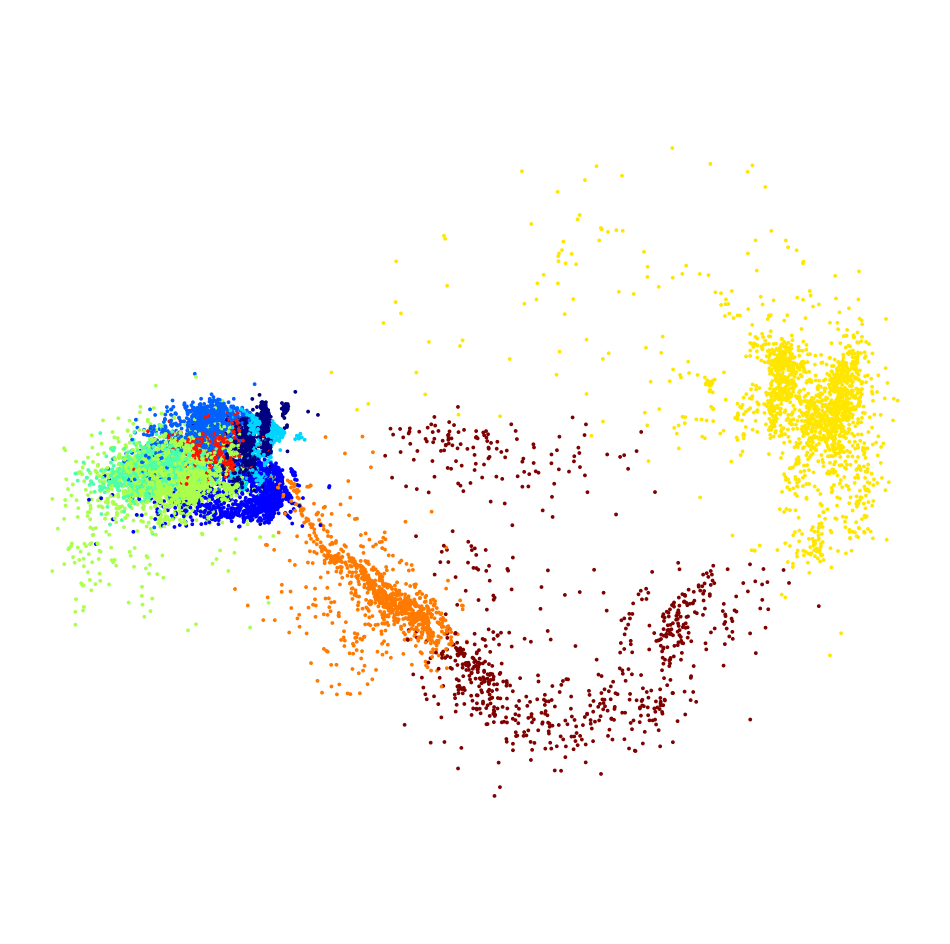

In [15]:
plot_data(isomap_embedding, labels, title="", display=True, save=True, grid=False, axis=False)

In [16]:
from sklearn.manifold import TSNE

In [17]:
tsne = TSNE(
    n_components=2,       # Initialize with MDS results
    random_state=42,
    perplexity=30,
    n_iter=1000
)

In [18]:
%%time
tsne_embedding = tsne.fit_transform(data)

CPU times: user 1h 3min 25s, sys: 2min 27s, total: 1h 5min 53s
Wall time: 1min 3s


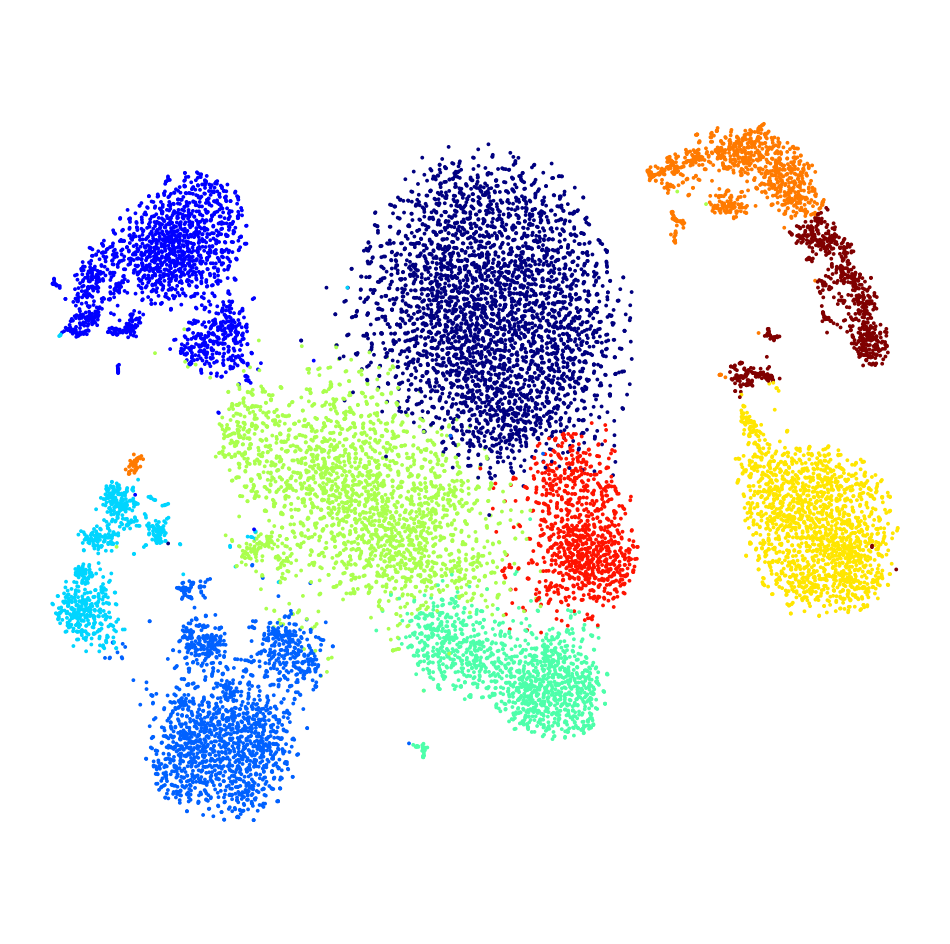

In [19]:
plot_data(tsne_embedding, labels, title="", display=True, save=True, grid=False, axis=False)